In [6]:
# We import necessary libraries
# Please do not use scikit-learn or any other package. Implement K-NN classification yourself.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

In [42]:
# Here we read the provided ushape.csv file
# We have retained only a small number of rows to ensure computational easiness and clear visualization
df = pd.read_csv('ushape.csv',names=['X','Y', 'C'], header=0, index_col=None)

<Axes: xlabel='X', ylabel='Y'>

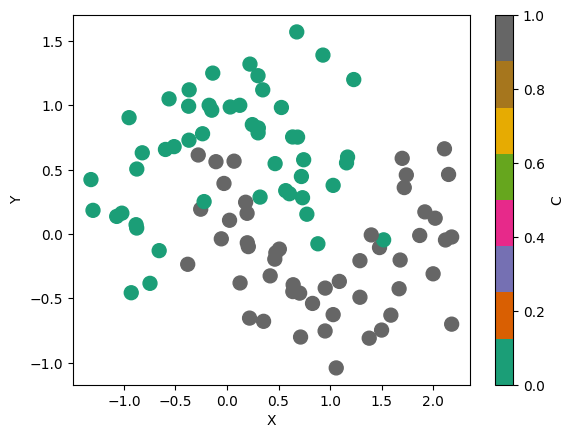

In [43]:
# Let us see how the data looks like
df.plot.scatter('X','Y',c='C', s=100, colormap='Dark2')

In [44]:
# This function implements the L2 distance between two sets of points
def l2(x1,y1, x2, y2):
    distance = np.sqrt((x1-x2)**2 + (y1-y2)**2)
    return distance

In [45]:
# The following function computes the distances between a test point and all the training points
def distance(x_test, y_test):
    distances = list()
    for index, row in df.iterrows():
        d = l2(row['X'], row['Y'], x_test, y_test)
        distances.append(d)
    return np.array(distances)

In [46]:

# You need to complete the following function. 
# The following function should assign the class to a point (x_test, y_test) using K-NN classification
def knn_classification(x_test, y_test, k):
    dist=distance(x_test,y_test)
    sorted_indices = np.argsort(dist)
    k_nearest_labels = df['C'][sorted_indices[:k]]
    unique_labels, counts = np.unique(k_nearest_labels, return_counts=True)
    return unique_labels[np.argmax(counts)]

In [47]:
# You need to complete the following function.
# The following function should plot the decision surface for the two classes given the value of K.
# You need to test all the points between df.X.min() and df.X.max() and also df.Y.min() and df.Y.max().
def plot_decision_surface(k):
   light=ListedColormap(['#FFAAAA', '#AAAAFF'])
   bold=ListedColormap(['#FF0000','#0000FF'])
   x=df[['X','Y']].to_numpy()
   xmin,xmax=x[:, 0].min()-1,x[:, 0].max()+1
   ymin,ymax=x[:, 1].min()-1,x[:, 1].max()+1
   XX,YY=np.meshgrid(np.linspace(xmin,xmax,100),np.linspace(ymin,ymax,100))
   ZZ=[]
   for xx,yy in zip(XX.ravel(),YY.ravel()):
      ZZ.append(knn_classification(xx,yy,k))
   ZZ=np.array(ZZ).reshape(XX.shape)
   plt.pcolormesh(XX, YY, ZZ,cmap=light,shading='auto')
   plt.scatter(x[:,0], x[:,1],c=df['C'].to_numpy(),cmap=bold)
   plt.xlim(XX.min(), XX.max())
   plt.ylim(YY.min(), XX.max())
   plt.title('Decision boundary for K=%d'%k)
   plt.show()

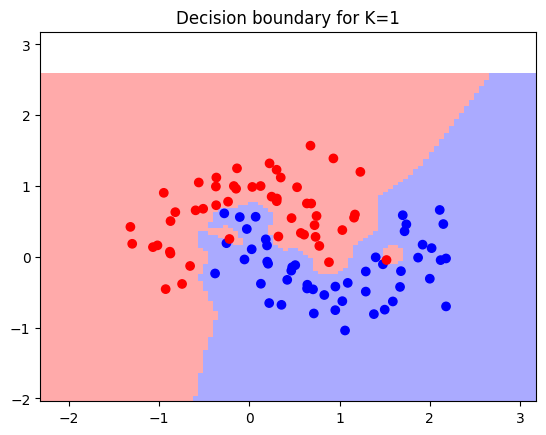

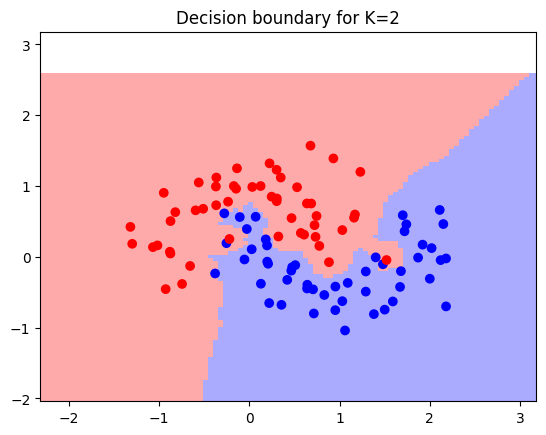

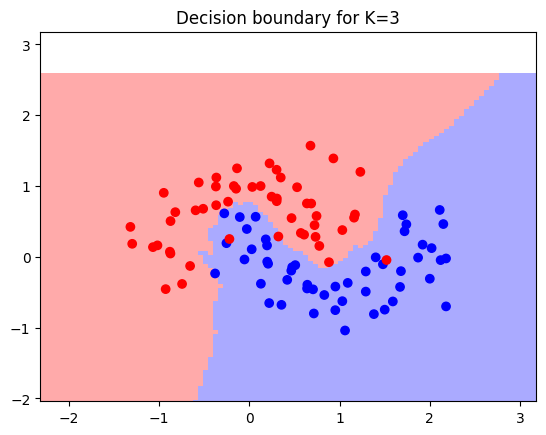

In [48]:
K=[1,2,3]
for k in range(1, 4):
    plot_decision_surface(k)

With smaller values of k, the decision boundary tends to be more sensitive to noise or outliers in the data. A single outlier can have a significant impact on the classification of a point. Smaller values of k result in more complex decision boundaries that follow the fluctuations in the training data more closely. This can lead to overfitting, especially if the dataset has noise.

s k increases, the decision boundary becomes smoother and less sensitive to local variations in the data. The model becomes more robust to noise and outliers. However, if the value of k is too large (which we do not have here in our example; just worth mentioning), the model might underfit the data, meaning it may fail to capture the underlying patterns and relationships in the dataset. 